In [3]:
#pip install pandas scikit-learn matplotlib

In [38]:
#Importing all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, roc_auc_score
from wordcloud import WordCloud

In [5]:
#Load datasets
train_df = pd.read_csv("spam_messages_train.csv")
test_df = pd.read_csv("spam_messages_test.csv")

#Split features and labels
x_train_text = train_df["text"]
y_train = train_df["label"]

x_test_text = test_df["text"]
y_test = test_df["label"]

In [6]:
#TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words="english")
x_train = vectorizer.fit_transform(x_train_text)
x_test = vectorizer.transform(x_test_text)

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.94      0.97      0.96      3595
        spam       0.95      0.91      0.93      2331

    accuracy                           0.95      5926
   macro avg       0.95      0.94      0.94      5926
weighted avg       0.95      0.95      0.95      5926

Sample Prediction (Naïve Bayes): ['ham']


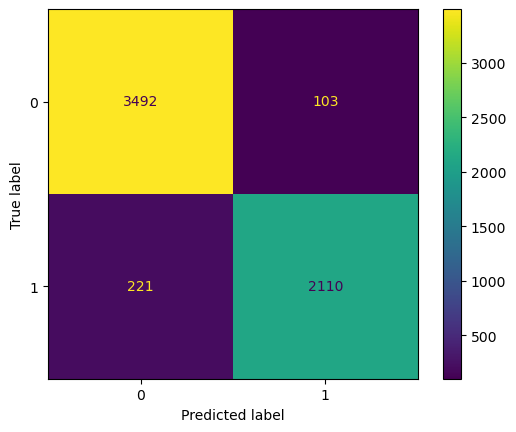

In [7]:
#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

nb_predictions = nb_model.predict(x_test)

print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))


# Naive Bayes sample prediction
sample_message = ["Hello I am Ram. I was your friend back in school"]
sample_vector = vectorizer.transform(sample_message)

print("Sample Prediction (Naïve Bayes):", nb_model.predict(sample_vector))


# Naive Bayes confusion matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
ConfusionMatrixDisplay(confusion_matrix=nb_cm).plot()
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.95      0.96      0.96      3595
        spam       0.94      0.93      0.94      2331

    accuracy                           0.95      5926
   macro avg       0.95      0.95      0.95      5926
weighted avg       0.95      0.95      0.95      5926

Sample Prediction (Logistic Regression): ['ham']


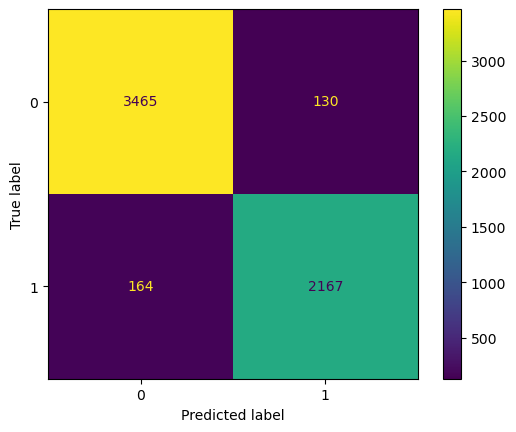

In [8]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

lr_predictions = lr_model.predict(x_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


#Logistic Regression sample prediction
print("Sample Prediction (Logistic Regression):", lr_model.predict(sample_vector))


#Logistic Regression confusion matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
ConfusionMatrixDisplay(confusion_matrix=lr_cm).plot()
plt.show()

In [9]:
#Get probability scores
nb_probs = nb_model.predict_proba(x_test)[:, 1]
lr_probs = lr_model.predict_proba(x_test)[:, 1]

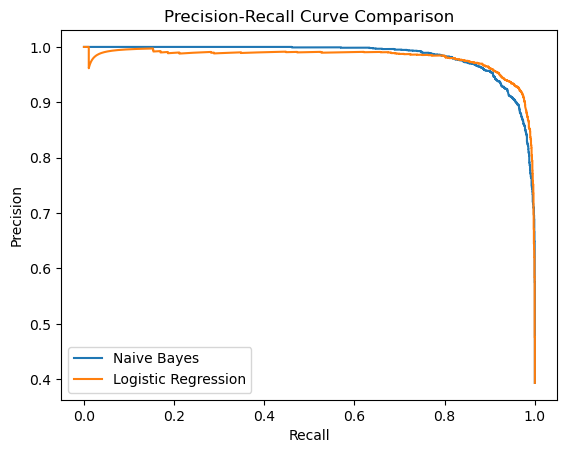

In [10]:
#Precision-Recall Curves
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs, pos_label="spam")
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs, pos_label="spam")

plt.figure()
plt.plot(nb_recall, nb_precision, label="Naive Bayes")
plt.plot(lr_recall, lr_precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

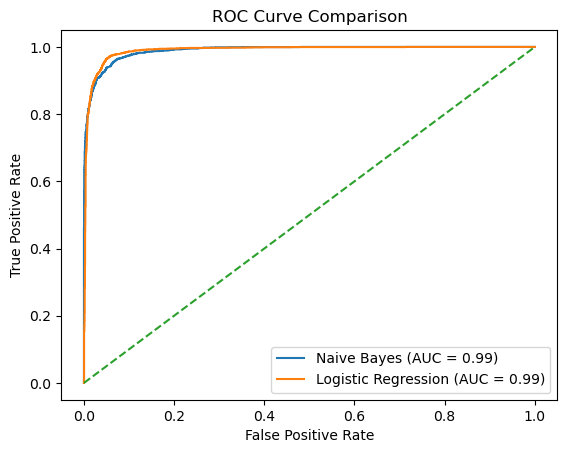

In [11]:
#ROC Curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label="spam")
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label="spam")

plt.figure()
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {roc_auc_score(y_test, nb_probs):.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, lr_probs):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

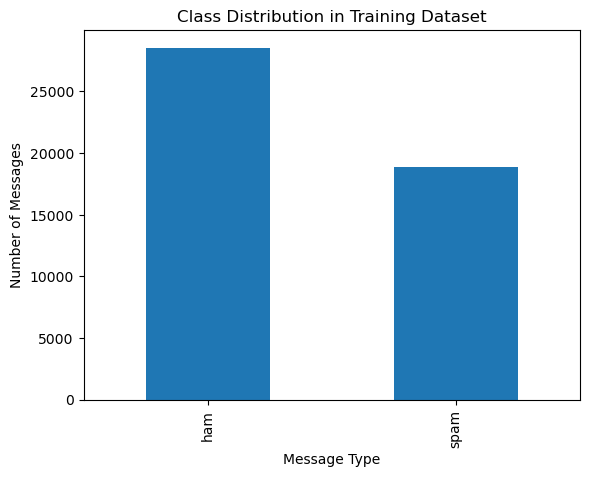

In [26]:
# Class distribution in training set
train_counts = train_df["label"].value_counts()

plt.figure()
train_counts.plot(kind="bar")
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Message Type")
plt.ylabel("Number of Messages")
plt.show()

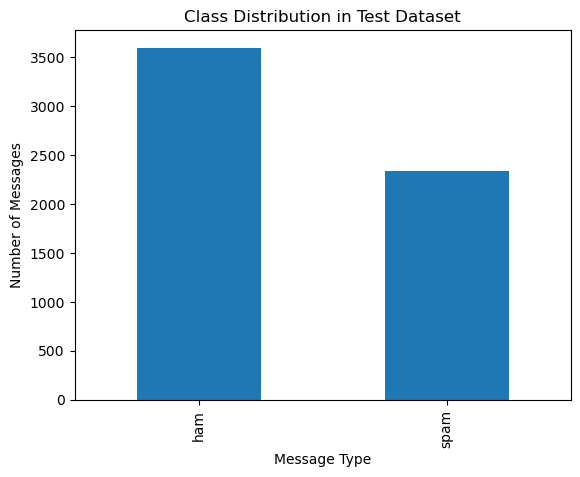

In [28]:
# Class distribution in test set
test_counts = test_df["label"].value_counts()

plt.figure()
test_counts.plot(kind="bar")
plt.title("Class Distribution in Test Dataset")
plt.xlabel("Message Type")
plt.ylabel("Number of Messages")
plt.show()

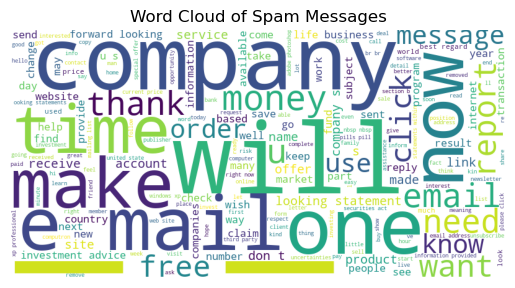

In [40]:
#Combining spam messages from training data
spam_text = " ".join(train_df[train_df["label"] == "spam"]["text"])

spam_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(spam_text)

plt.figure()
plt.imshow(np.array(spam_wordcloud.to_image()))
plt.axis("off")
plt.title("Word Cloud of Spam Messages")
plt.show()

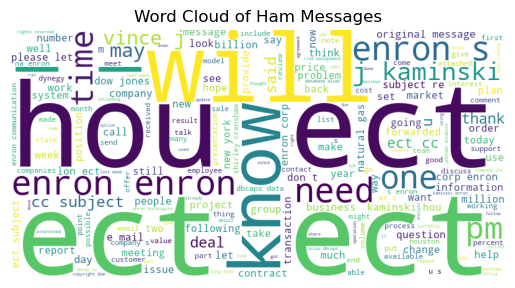

In [42]:
#Combining ham messages from training data
ham_text = " ".join(train_df[train_df["label"] == "ham"]["text"])

ham_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(ham_text)

plt.figure()
plt.imshow(np.array(ham_wordcloud.to_image()))
plt.axis("off")
plt.title("Word Cloud of Ham Messages")
plt.show()

In [13]:
#Prediction on New Message
def predict_message(message, model, vectorizer):
    #Transform unseen message using trained TF-IDF vectorizer
    message_vector = vectorizer.transform([message])
    #Predict spam or ham
    return model.predict(message_vector)[0]


sample_message = "Don’t forget about the assignment submission tomorrow."

print("Naïve Bayes Prediction:",
      predict_message(sample_message, nb_model, vectorizer))

print("Logistic Regression Prediction:",
      predict_message(sample_message, lr_model, vectorizer))

Naïve Bayes Prediction: ham
Logistic Regression Prediction: ham
